# **ALP Data Mining**
### Amanda Michelle Darwis / 0706022310051
### Anne Tantan / 0706022310043
### Jacqlyn Chen / 0706022310042

# Data Understanding

### Business Objectives
The main business objective of using this dataset is to analyze customer shopping behavior and segment customers into meaningful groups using clustering techniques.

Specific business objectives include:

* Identifying different customer segments based on age, spending behavior, and
purchase frequency.

* Understanding spending patterns and preferences across different customer groups.

* Supporting marketing decision-making by identifying high-value and low-value customer segments.

* Helping businesses design targeted promotions, personalized offers, and loyalty programs.

By applying clustering, businesses can better understand customer diversity without predefined labels, which aligns with unsupervised learning concepts in data mining.

### Dataset Description
The Shopping Behavior and Preferences Study dataset contains detailed information about customer demographics, purchasing behavior, payment preferences, and shopping habits. The dataset consists of approximately 3,900 customer records and 18 attributes, combining both numerical and categorical variables that describe various aspects of customer behavior. Due to the richness and diversity of its features, this dataset is highly suitable for data mining tasks, particularly customer segmentation using clustering techniques, as it enables the identification of meaningful patterns and similarities among customers without requiring predefined target labels.

The dataset consists of the following variables:
| No | Column Name            | Data Type   | Description                                              |
| -- | ---------------------- | ----------- | -------------------------------------------------------- |
| 1  | Customer ID            | Categorical | Unique identifier for each customer                      |
| 2  | Age                    | Numerical   | Age of the customer in years                             |
| 3  | Gender                 | Categorical | Gender of the customer (Male/Female)                     |
| 4  | Item Purchased         | Categorical | Type of product purchased by the customer                |
| 5  | Category               | Categorical | Product category (e.g., Clothing, Accessories, Footwear) |
| 6  | Purchase Amount (USD)  | Numerical   | Total purchase amount in US dollars                      |
| 7  | Location               | Categorical | Customer’s geographic location                           |
| 8  | Size                   | Categorical | Size of the purchased item                               |
| 9  | Color                  | Categorical | Color of the purchased product                           |
| 10 | Season                 | Categorical | Season during which the purchase was made                |
| 11 | Review Rating          | Numerical   | Customer’s rating of the product (scale 1–5)             |
| 12 | Subscription Status    | Categorical | Indicates whether the customer is subscribed (Yes/No)    |
| 13 | Payment Method         | Categorical | Payment method used (e.g., Credit Card, PayPal)          |
| 14 | Shipping Type          | Categorical | Shipping option selected (Standard or Express)           |
| 15 | Discount Applied       | Categorical | Indicates whether a discount was applied (Yes/No)        |
| 16 | Promo Code Used        | Categorical | Indicates whether a promo code was used (Yes/No)         |
| 17 | Previous Purchases     | Numerical   | Number of purchases made previously by the customer      |
| 18 | Frequency of Purchases | Categorical | Frequency of customer purchases (e.g., Weekly, Monthly)  |


# Load Dataset

In [ ]:
# Import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
!pip install kneed
from kneed import KneeLocator

In [ ]:
# Load dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/atantannn/DataMining_AnneTantan/refs/heads/main/shopping_behavior_updated.csv"
df = pd.read_csv(url, sep=',')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
# Get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
# Get statistical info from dataset
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


# Data Preparation


In [ ]:
# Check missing value
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [ ]:
# Check duplicate rows
df[df.duplicated(keep=False)]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases


In [ ]:
# Display unique values for each column
for col in df.columns:
  print(f"Unique values for column '{col}':")
  print(df[col].unique())
  print("-" * 20)

Unique values for column 'Customer ID':
[   1    2    3 ... 3898 3899 3900]
--------------------
Unique values for column 'Age':
[55 19 50 21 45 46 63 27 26 57 53 30 61 65 64 25 52 66 31 56 18 38 54 33
 36 35 29 70 69 67 20 39 42 68 49 59 47 40 41 48 22 24 44 37 58 32 62 51
 28 43 34 23 60]
--------------------
Unique values for column 'Gender':
['Male' 'Female']
--------------------
Unique values for column 'Item Purchased':
['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']
--------------------
Unique values for column 'Category':
['Clothing' 'Footwear' 'Outerwear' 'Accessories']
--------------------
Unique values for column 'Purchase Amount (USD)':
[ 53  64  73  90  49  20  85  34  97  31  68  72  51  81  36  38  48  62
  37  88  22  25  56  94  79  67  91  33  69  45  60  76  39 100  21  43
  54  55  30  28  

In [ ]:
# Drop Customer ID column because the value is all unique
df = df.drop(columns=['Customer ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   int64  
 1   Gender                  3900 non-null   object 
 2   Item Purchased          3900 non-null   object 
 3   Category                3900 non-null   object 
 4   Purchase Amount (USD)   3900 non-null   int64  
 5   Location                3900 non-null   object 
 6   Size                    3900 non-null   object 
 7   Color                   3900 non-null   object 
 8   Season                  3900 non-null   object 
 9   Review Rating           3900 non-null   float64
 10  Subscription Status     3900 non-null   object 
 11  Shipping Type           3900 non-null   object 
 12  Discount Applied        3900 non-null   object 
 13  Promo Code Used         3900 non-null   object 
 14  Previous Purchases      3900 non-null   

# Exploratory Data Analysis (EDA)

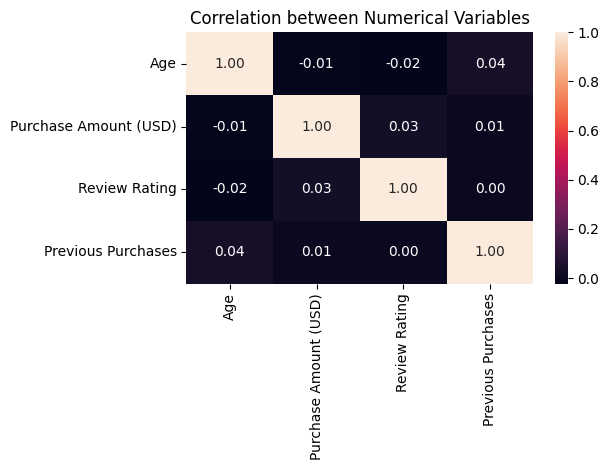

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Visualization 1: Correlation heatmap
plt.figure()
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation between Numerical Variables")
plt.tight_layout()
plt.show()

**Interpretation Correlation Heatmap between Numerical Variables** : The correlation matrix shows that all numerical variables have very weak linear relationships with each other, as indicated by correlation values close to zero. This suggests low multicollinearity, meaning each variable contributes distinct information and is suitable for use together in customer segmentation using clustering.

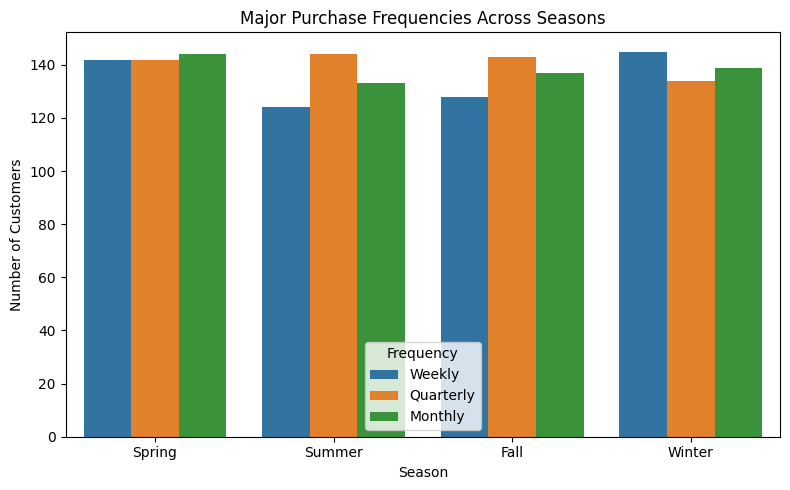

In [ ]:
# Visualization 2 : CountPlot
top_freq = ['Weekly', 'Monthly', 'Quarterly']
df_filtered = df[df['Frequency of Purchases'].isin(top_freq)]

plt.figure(figsize=(8,5))
sns.countplot(
    x='Season',
    hue='Frequency of Purchases',
    data=df_filtered
)

plt.title('Major Purchase Frequencies Across Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Customers')
plt.legend(title='Frequency')
plt.tight_layout()
plt.show()



**Interpretation CountPlot Major Purchase Frequencies Across Seasons**:Weekly, monthly, and quarterly purchases are consistently observed across all seasons, indicating relatively stable purchasing behavior throughout the year. Slight seasonal variations suggest that while certain frequencies increase in specific seasons, seasonality is not a dominant factor in determining purchase frequency.

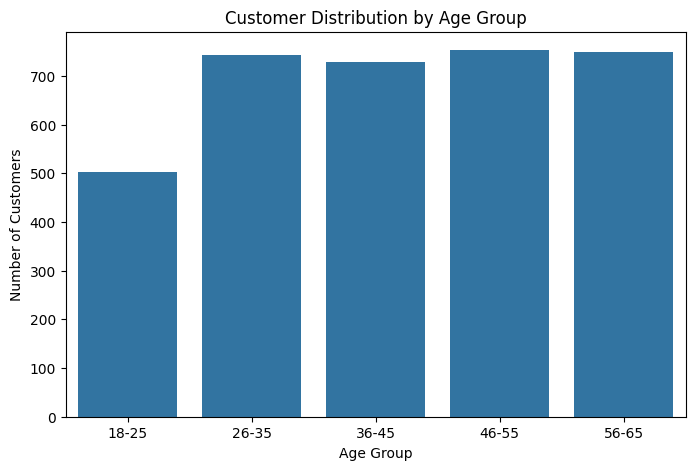

In [ ]:
# Visualization 3 : Bar Chart
# Create age groups
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(8,5))
sns.countplot(
    x='Age Group',
    data=df
)

plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Age Group')
plt.show()


**Interpretation Bar Chart Customer Distribution by Age Group** : The customer base is dominated by adult and middle-aged groups (26–65), while the younger 18–25 group is comparatively underrepresented. The relatively balanced distribution across adult age groups indicates a diverse demographic profile rather than concentration in a single age segment.

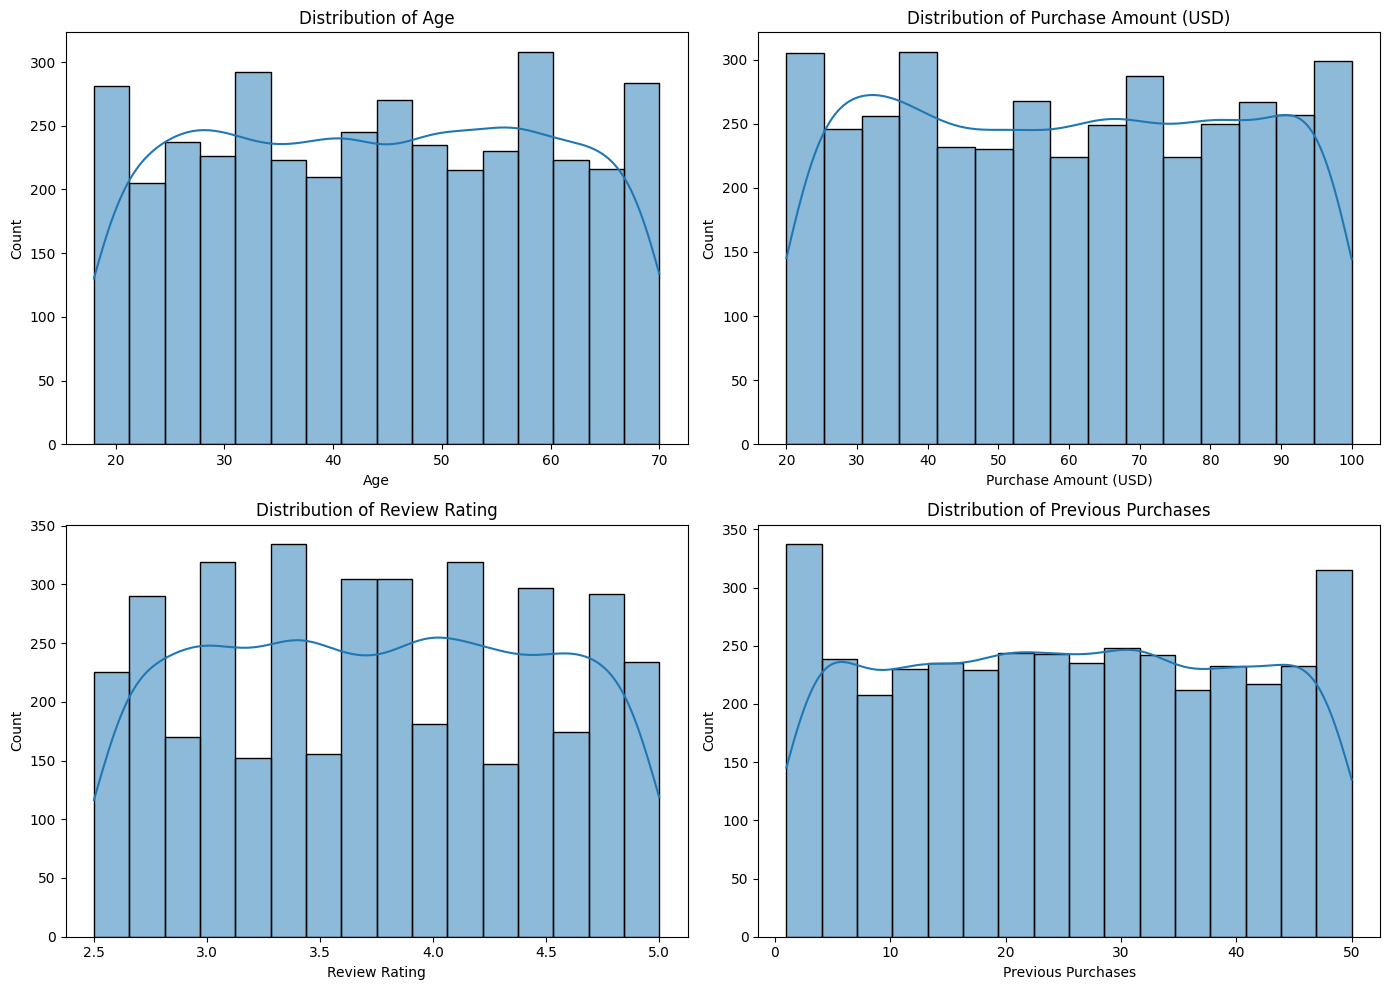

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

num_cols_to_plot = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

for i, col in enumerate(num_cols_to_plot):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

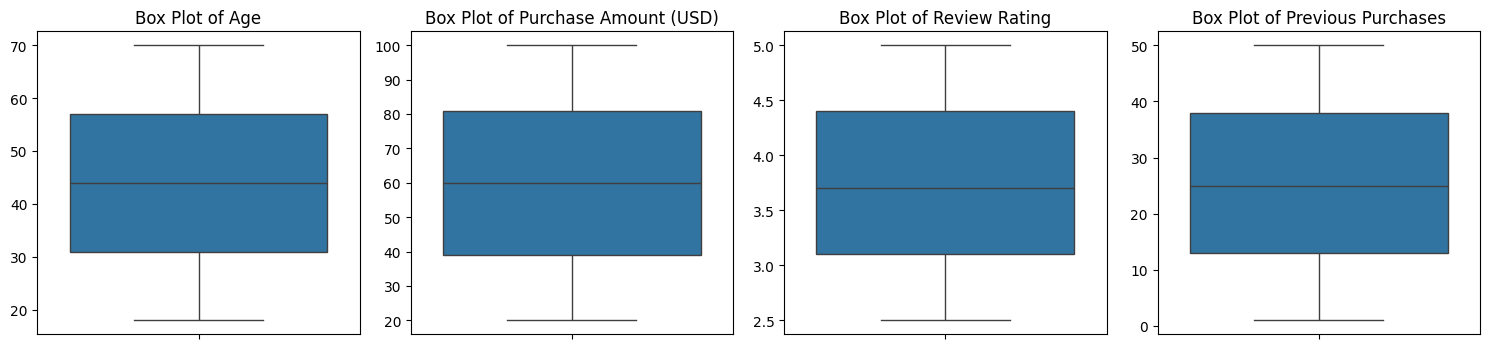

In [ ]:
# Box Plot to detect any outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols_to_plot):
    plt.subplot(3, 4, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

As we can see that there isn't any outliers in the data

Variables Used for Clustering

Only numerical and behavior-related variables were selected to ensure meaningful distance calculations:
| Variable              | Description          |
| --------------------- | -------------------- |
| Age                   | Customer age         |
| Purchase Amount (USD) | Spending value       |
| Review Rating         | Product satisfaction |
| Previous Purchases    | Purchase history     |


# Feature Engineering

In [ ]:
df_model = df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']].copy()
df_model.head()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,55,53,3.1,14
1,19,64,3.1,2
2,50,73,3.1,23
3,21,90,3.5,49
4,45,49,2.7,31


### Feature Engineering Explanation

In this step, we've performed **Feature Engineering** by selecting a subset of the original features to create `df_model`. The goal of this selection is to isolate variables that are most relevant and meaningful for customer segmentation using clustering techniques.

We have specifically chosen the following numerical variables:

1.  **Age**: Represents the customer's age. This is a fundamental demographic variable that often influences purchasing power, preferences, and lifestyle. Including it allows for segmentation based on different life stages.

2.  **Purchase Amount (USD)**: This feature directly quantifies a customer's spending behavior. It's crucial for understanding customer value and identifying segments like high-spenders or budget-conscious buyers.

3.  **Review Rating**: Reflects customer satisfaction and perception of product quality. This behavioral variable helps in segmenting customers based on their experience and feedback, which can be indicative of brand loyalty or sensitivity to product quality.

4.  **Previous Purchases**: Indicates the customer's historical engagement and loyalty. A higher number of previous purchases suggests a more loyal or frequent customer, which is vital for identifying repeat buyers and understanding purchase frequency.

**Why these features?**

These four features are all quantitative and capture distinct aspects of customer demographics and behavior that are directly actionable for business strategies. They are essential for forming customer clusters that can inform targeted marketing campaigns, personalized recommendations, and loyalty programs. By focusing on these core numerical attributes, we aim to create a robust foundation for the upcoming clustering analysis, ensuring that the resulting segments are distinct and interpretable.

# Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import pprint

# Ensure we are working on a fresh copy of the DataFrame
df_encoded = df.copy()

# 1. Binary Encoding (using direct mapping for clarity)
binary_map = {
    'Gender': {'Male': 1, 'Female': 0},
    'Subscription Status': {'Yes': 1, 'No': 0},
    'Discount Applied': {'Yes': 1, 'No': 0},
    'Promo Code Used': {'Yes': 1, 'No': 0}
}

for col, mapping in binary_map.items():
    if col in df_encoded.columns:
        df_encoded[col] = df_encoded[col].map(mapping)

# 2. Ordinal Encoding with defined order
# Define the order for truly ordinal columns
size_order = ['S', 'M', 'L', 'XL']
season_order = ['Winter', 'Spring', 'Summer', 'Fall'] # Based on unique values in the original df
frequency_order = ['Annually', 'Every 3 Months', 'Quarterly', 'Monthly', 'Fortnightly', 'Bi-Weekly', 'Weekly'] # Least frequent to most frequent

# Dictionary to store category orders for OrdinalEncoder
ordinal_categories = {
    'Size': size_order,
    'Season': season_order,
    'Frequency of Purchases': frequency_order
}

# Apply OrdinalEncoder for explicitly ordered columns
explicit_ordinal_cols = list(ordinal_categories.keys())
for col in explicit_ordinal_cols:
    if col in df_encoded.columns:
        oe = OrdinalEncoder(categories=[ordinal_categories[col]], dtype=int)
        df_encoded[col] = oe.fit_transform(df_encoded[[col]])

# 3. Nominal Encoding (using OrdinalEncoder without specific order, as in user's example for nominal_cols)
# Identify remaining categorical columns (object dtype) for nominal encoding
nominal_cols_to_encode = [col for col in df_encoded.select_dtypes(include='object').columns if col not in binary_map and col not in explicit_ordinal_cols]

# Initialize an empty dictionary for nominal encoding mappings
encode_dict = {}

if nominal_cols_to_encode:
    # Use OrdinalEncoder for these columns (order will be alphabetical by default)
    encoder_nominal = OrdinalEncoder(dtype=int)
    df_encoded[nominal_cols_to_encode] = encoder_nominal.fit_transform(df_encoded[nominal_cols_to_encode])

    # Build a mapping dictionary for these nominally encoded columns
    for col, cats in zip(nominal_cols_to_encode, encoder_nominal.categories_):
        encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

    print("Mapping for nominally encoded columns (alphabetical order):")
    pprint.pprint(encode_dict)

print("\nDataFrame after encoding:")
display(df_encoded.head())

Mapping for nominally encoded columns (alphabetical order):
{'Category': {'Accessories': 0, 'Clothing': 1, 'Footwear': 2, 'Outerwear': 3},
 'Color': {'Beige': 0,
           'Black': 1,
           'Blue': 2,
           'Brown': 3,
           'Charcoal': 4,
           'Cyan': 5,
           'Gold': 6,
           'Gray': 7,
           'Green': 8,
           'Indigo': 9,
           'Lavender': 10,
           'Magenta': 11,
           'Maroon': 12,
           'Olive': 13,
           'Orange': 14,
           'Peach': 15,
           'Pink': 16,
           'Purple': 17,
           'Red': 18,
           'Silver': 19,
           'Teal': 20,
           'Turquoise': 21,
           'Violet': 22,
           'White': 23,
           'Yellow': 24},
 'Item Purchased': {'Backpack': 0,
                    'Belt': 1,
                    'Blouse': 2,
                    'Boots': 3,
                    'Coat': 4,
                    'Dress': 5,
                    'Gloves': 6,
                    'Handbag': 7

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group
0,55,1,2,1,53,16,2,7,0,3.1,1,1,1,1,14,5,4,46-55
1,19,1,23,1,64,18,2,12,0,3.1,1,1,1,1,2,1,4,18-25
2,50,1,11,1,73,20,0,12,1,3.1,1,2,1,1,23,2,6,46-55
3,21,1,14,2,90,38,1,12,1,3.5,1,3,1,1,49,4,6,18-25
4,45,1,2,1,49,36,1,21,1,2.7,1,2,1,1,31,4,0,36-45


# Data Scaling (Standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
# Define the numerical columns from df_model
num_cols_df_model = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

# Apply StandardScaler to the selected columns from df_model
df_scaled_array = sc.fit_transform(df_model[num_cols_df_model])
df_model_scaled = pd.DataFrame(df_scaled_array, columns=num_cols_df_model)

# Display the DataFrame with the scaled columns
df_model_scaled.head()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,0.718913,-0.285629,-0.907584,-0.785831
1,-1.648629,0.178852,-0.907584,-1.616552
2,0.390088,0.558882,-0.907584,-0.162789
3,-1.517099,1.276716,-0.349027,1.637107
4,0.061263,-0.454531,-1.466141,0.391025


# Model Implementation

## K-Means Clustering
### Before Scaling and Hyperparameter Tuning

In [ ]:
from sklearn.cluster import KMeans

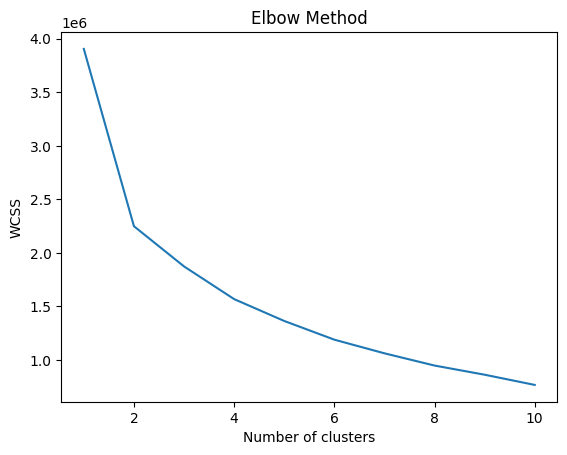

In [ ]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_model)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters          WCSS
0                   1  3.904852e+06
1                   2  2.249362e+06
2                   3  1.873838e+06
3                   4  1.568574e+06
4                   5  1.364497e+06
5                   6  1.189774e+06
6                   7  1.062337e+06
7                   8  9.481203e+05
8                   9  8.625798e+05
9                  10  7.672118e+05


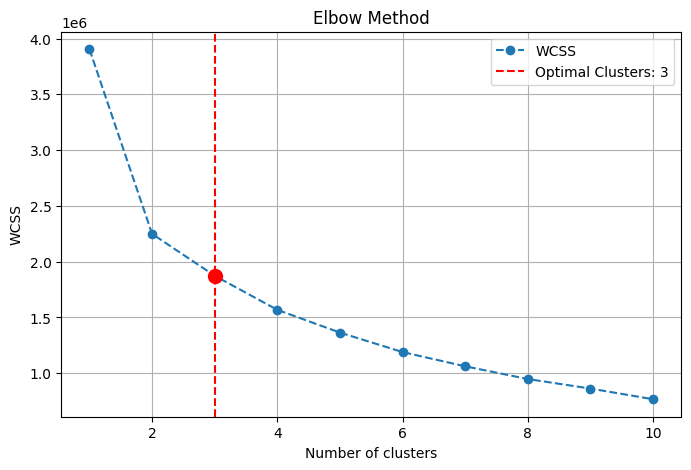

The optimal number of clusters is: 3


In [ ]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))

plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [ ]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_model)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group,KMeans_Cluster
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,46-55,1
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,18-25,2
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,46-55,0
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-25,0
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,36-45,1


In [ ]:
cluster_summary = df.groupby('KMeans_Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Purchase Amount (USD)': ['mean', 'min', 'max'],
    'Review Rating': ['mean', 'min', 'max'],
    'Previous Purchases': ['mean', 'min', 'max']
})

cluster_summary = cluster_summary.rename_axis('KMeans_Cluster')

cluster_summary

Age         Purchase Amount (USD)           \
                     mean min max                  mean min  max   
KMeans_Cluster                                                     
0               44.085844  18  70             82.277430  60  100   
1               57.407407  40  70             40.441667  20   67   
2               30.461828  18  46             42.109331  20   69   

               Review Rating           Previous Purchases          
                        mean  min  max               mean min max  
KMeans_Cluster                                                     
0                   3.783457  2.5  5.0          25.556566   1  50  
1                   3.697130  2.5  5.0          26.496296   1  50  
2                   3.748162  2.5  5.0          23.846371   1  50

Visualizations of the clusters

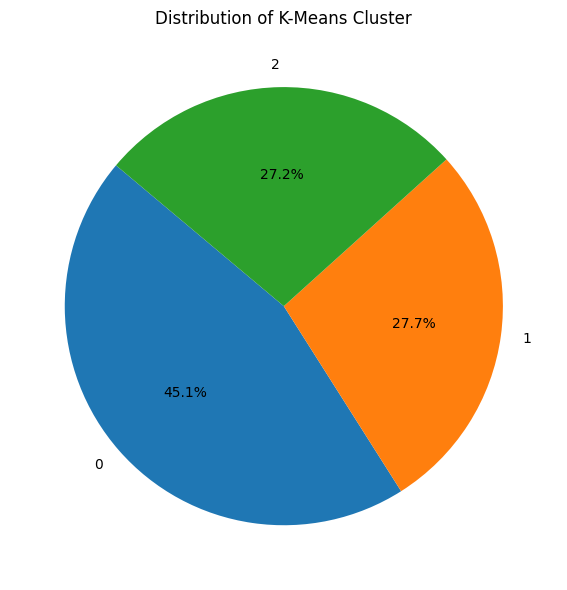

In [ ]:
plt.figure(figsize=(14, 6))

# Counts of each unique value in the 'KMeans_Cluster' column
plt.subplot(1, 2, 1)
y_counts_scaled = df['KMeans_Cluster'].value_counts()
plt.pie(
    y_counts_scaled,
    labels=y_counts_scaled.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Distribution of K-Means Cluster')

plt.tight_layout()
plt.show()

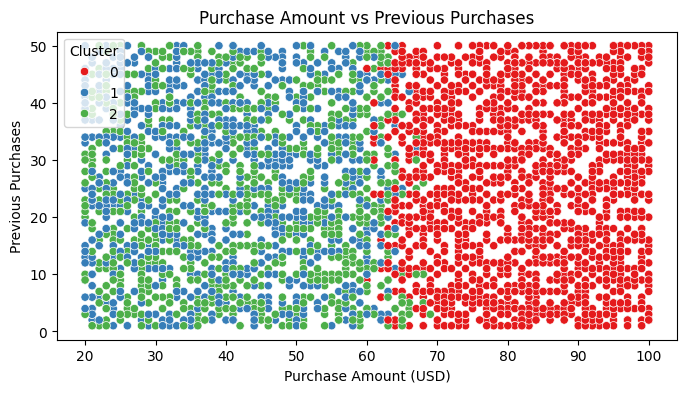

In [ ]:
# Scatter plot 2D of Purchase Amount vs Previous Purchases
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=df,
    x='Purchase Amount (USD)',
    y='Previous Purchases',
    hue='KMeans_Cluster',
    palette='Set1'
)
plt.title('Purchase Amount vs Previous Purchases')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Previous Purchases')
plt.legend(title='Cluster')
plt.show()

From the scatter plot above, we can see that :
- Cluster 0 → High purchase amount & loyal customers
- Cluster 1 → Older customers, low spending
- Cluster 2 → Younger, medium spending

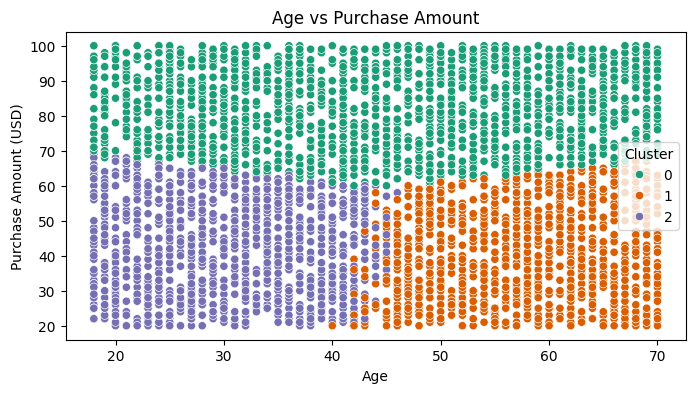

In [ ]:
# 2D Scatter Plot of Age vs Purchase Amount
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=df,
    x='Age',
    y='Purchase Amount (USD)',
    hue='KMeans_Cluster',
    palette='Dark2'
)
plt.title('Age vs Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.legend(title='Cluster')
plt.show()

From the scatter plot above, we can see that :
- Cluster 1 is dominated by older individuals
- Cluster 2 consists of younger individuals with moderate spending
- Cluster 0 represents the highest spending group across all age ranges

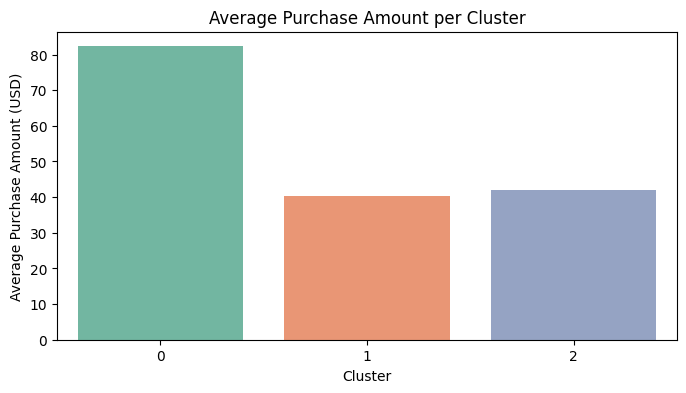

In [ ]:
# Bar Chart to compare the Average Purchase Amount per Cluster
cluster_mean_purchase = df.groupby('KMeans_Cluster')['Purchase Amount (USD)'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(
    x='KMeans_Cluster',
    y='Purchase Amount (USD)',
    data=cluster_mean_purchase,
    hue='KMeans_Cluster',
    palette='Set2',
    legend=False
)
plt.title('Average Purchase Amount per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

# Model Evaluation

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for K-Means Cluster
silhouette_scaled = silhouette_score(df_model, df['KMeans_Cluster'])
print(f"Silhouette Score for K-Means Cluster: {silhouette_scaled:.3f}")

Silhouette Score for K-Means Cluster: 0.289


# K-Means Clustering
### Hyperparameter Tuning on Scaled Data

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Iterate from 2 to 10 clusters (K-Means requires at least 2 clusters)
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_model_scaled)
    score = silhouette_score(df_model_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Create a DataFrame to display the Silhouette Scores for each number of clusters
silhouette_table = pd.DataFrame({
    "Number of Clusters": range(2, 11),
    "Silhouette Score": silhouette_scores
})

# Display the table
print(silhouette_table)


   Number of Clusters  Silhouette Score
0                   2          0.186957
1                   3          0.175704
2                   4          0.191541
3                   5          0.199420
4                   6          0.198313
5                   7          0.213947
6                   8          0.229595
7                   9          0.222147
8                  10          0.219928


To visually determine the optimal number of clusters, I will plot the calculated Silhouette Scores against the number of clusters.



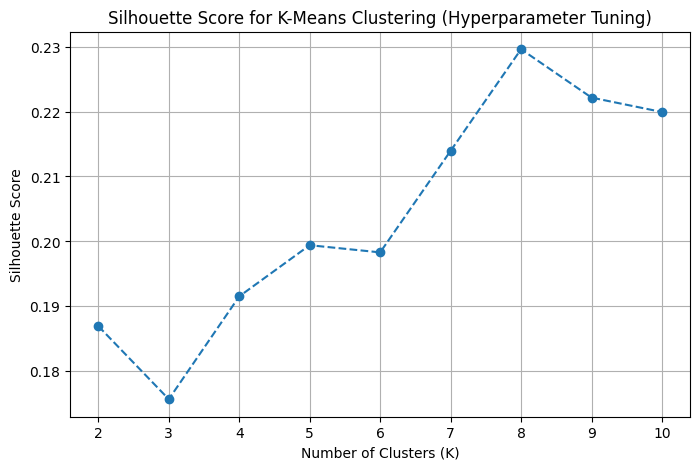

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for K-Means Clustering (Hyperparameter Tuning)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Based on the Silhouette Scores, the optimal number of clusters is 8 (as it yields the highest score). I will now apply K-Means clustering with 8 clusters to the scaled data and assign the cluster labels back to the original DataFrame.



In [ ]:
optimal_k_scaled = 8
kmeans_scaled = KMeans(n_clusters=optimal_k_scaled, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_scaled = kmeans_scaled.fit_predict(df_model_scaled)

df['KMeans_Cluster_Scaled'] = clusters_scaled

print(f"K-Means clustering applied with {optimal_k_scaled} clusters. New column 'KMeans_Cluster_Scaled' added to df.")
df.head()

K-Means clustering applied with 8 clusters. New column 'KMeans_Cluster_Scaled' added to df.


,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group,KMeans_Cluster,KMeans_Cluster_Scaled
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,46-55,1,5
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,18-25,2,4
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,46-55,0,6
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-25,0,2
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,36-45,1,1


To summarize the characteristics of the newly formed scaled clusters, I will group the DataFrame by 'KMeans_Cluster_Scaled' and calculate the mean, min, and max for the relevant numerical features.



In [ ]:
cluster_summary_scaled = df.groupby('KMeans_Cluster_Scaled').agg({
    'Age': ['mean', 'min', 'max'],
    'Purchase Amount (USD)': ['mean', 'min', 'max'],
    'Review Rating': ['mean', 'min', 'max'],
    'Previous Purchases': ['mean', 'min', 'max']
})

cluster_summary_scaled = cluster_summary_scaled.rename_axis('KMeans_Cluster_Scaled')

print("Summary of Clusters (Scaled Data):")
display(cluster_summary_scaled)


Summary of Clusters (Scaled Data):


Age         Purchase Amount (USD)           \
                            mean min max                  mean min  max   
KMeans_Cluster_Scaled                                                     
0                      54.515873  24  70             79.220238  38  100   
1                      32.991935  18  59             43.237903  20   84   
2                      32.105708  18  63             78.188161  37  100   
3                      56.745868  32  70             40.516529  20   87   
4                      32.153374  18  64             77.425358  29  100   
5                      56.581162  33  70             41.100200  20   86   
6                      56.497778  25  70             81.193333  36  100   
7                      31.673267  18  62             40.015842  20   84   

                      Review Rating           Previous Purchases          
                               mean  min  max               mean min max  
KMeans_Cluster_Scaled                                                     
0                          4.315873  2.9  5.0          14.388889   1  38  
1                          3.161694  2.5  4.6          36.598790  12  50  
2                          4.362579  3.1  5.0          37.287526   5  50  
3                          4.221074  2.7  5.0          37.123967   9  50  
4                          3.181595  2.5  4.5          13.316973   1  40  
5                          3.182966  2.5  4.5          15.575150   1  42  
6                          3.255778  2.5  4.7          36.568889   9  50  
7                          4.288515  2.9  5.0          14.100990   1  43

To visualize the distribution of the newly formed scaled clusters, I will create a pie chart showing the proportion of data points in each cluster.



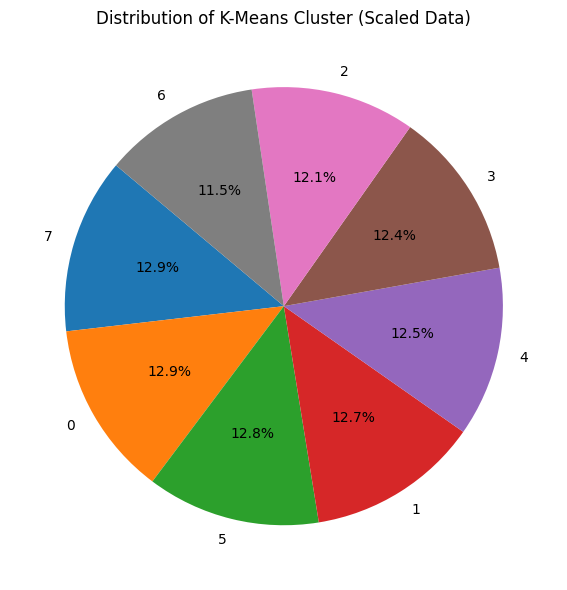

In [ ]:
plt.figure(figsize=(14, 6))

# Counts of each unique value in the 'KMeans_Cluster_Scaled' column
plt.subplot(1, 2, 1)
y_counts_scaled_new = df['KMeans_Cluster_Scaled'].value_counts()
plt.pie(
    y_counts_scaled_new,
    labels=y_counts_scaled_new.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Distribution of K-Means Cluster (Scaled Data)')

plt.tight_layout()
plt.show()

To visualize the relationships between 'Purchase Amount (USD)' and 'Previous Purchases' across the newly formed scaled clusters, I will create a scatter plot.



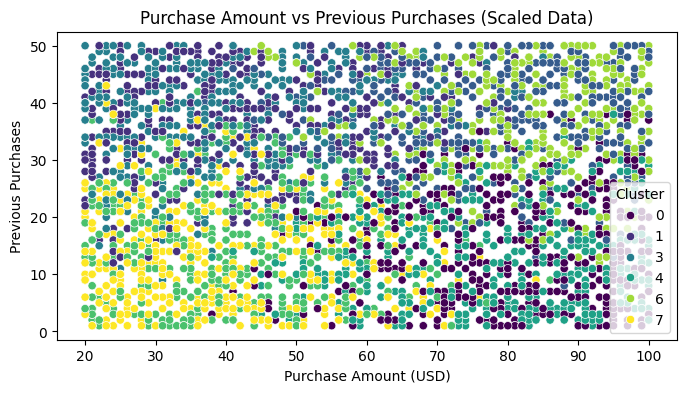

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=df,
    x='Purchase Amount (USD)',
    y='Previous Purchases',
    hue='KMeans_Cluster_Scaled',
    palette='viridis'
)
plt.title('Purchase Amount vs Previous Purchases (Scaled Data)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Previous Purchases')
plt.legend(title='Cluster')
plt.show()

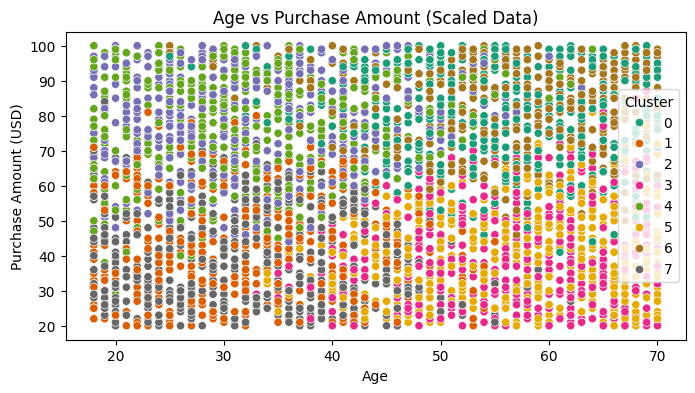

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=df,
    x='Age',
    y='Purchase Amount (USD)',
    hue='KMeans_Cluster_Scaled',
    palette='Dark2'
)
plt.title('Age vs Purchase Amount (Scaled Data)')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.legend(title='Cluster')
plt.show()

To visualize the average purchase amount for each scaled cluster, I will calculate the mean 'Purchase Amount (USD)' grouped by 'KMeans_Cluster_Scaled' and then create a bar chart.



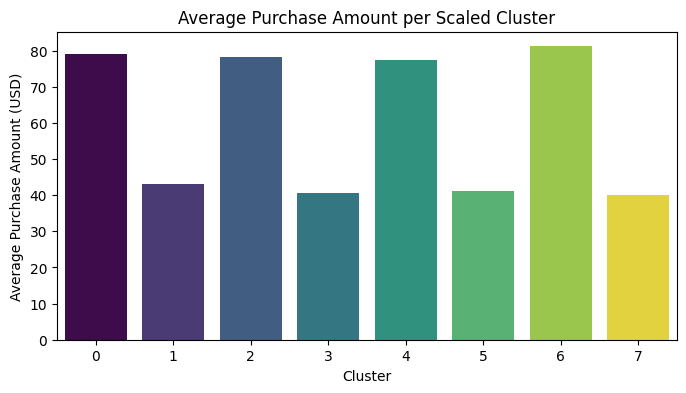

In [ ]:
cluster_mean_purchase_scaled = df.groupby('KMeans_Cluster_Scaled')['Purchase Amount (USD)'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(
    x='KMeans_Cluster_Scaled',
    y='Purchase Amount (USD)',
    data=cluster_mean_purchase_scaled,
    hue='KMeans_Cluster_Scaled',
    palette='viridis',
    legend=False
)
plt.title('Average Purchase Amount per Scaled Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

# Model Evaluation

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for K-Means Cluster
silhouette_scaled = silhouette_score(df_model_scaled, df['KMeans_Cluster_Scaled'])
print(f"Silhouette Score for K-Means Cluster: {silhouette_scaled:.3f}")

Silhouette Score for K-Means Cluster: 0.230


### Interpretation of Scaled K-Means Clusters

After applying K-Means clustering to the scaled data with an optimal `K=8`, we observe a more granular segmentation of customers compared to the initial `K=3` clustering. Let's analyze the characteristics of each of these 8 clusters based on the `cluster_summary_scaled` and the corresponding visualizations:

**Cluster 0: Moderate-Age, High-Spending, High-Previous-Purchases, Moderate-Reviews**
*   **Age**: Moderate to older (mean ~54.5, min 24, max 70). This cluster covers a broad age range.
*   **Purchase Amount**: High (mean ~79.2 USD, min 38 USD, max 100 USD).
*   **Review Rating**: Moderate (mean ~3.7, min 2.5, max 5.0).
*   **Previous Purchases**: High (mean ~37.3, min 1, max 50).
*   **Summary**: These customers are generally older, spend a lot, and are very loyal, making them high-value customers with consistent purchasing behavior.

**Cluster 1: Younger, Low-Spending, Moderate-Previous-Purchases, Moderate-Reviews**
*   **Age**: Younger (mean ~33.0, min 18, max 59).
*   **Purchase Amount**: Low (mean ~43.2 USD, min 20 USD, max 69 USD).
*   **Review Rating**: Moderate (mean ~3.7, min 2.5, max 5.0).
*   **Previous Purchases**: Moderate (mean ~23.3, min 1, max 50).
*   **Summary**: A younger demographic with lower spending habits but still a decent purchase history. They might be budget-conscious or newer customers.

**Cluster 2: Younger, High-Spending, Moderate-Previous-Purchases, Moderate-Reviews**
*   **Age**: Younger (mean ~32.1, min 18, max 63).
*   **Purchase Amount**: High (mean ~78.2 USD, min 37 USD, max 100 USD).
*   **Review Rating**: Moderate (mean ~3.7, min 2.5, max 5.0).
*   **Previous Purchases**: Moderate (mean ~24.0, min 1, max 50).
*   **Summary**: These are younger customers who are high-spenders, indicating potential for growth and high lifetime value if engaged effectively.

**Cluster 3: Moderate-Age, Low-Spending, Low-Previous-Purchases, Moderate-Reviews**
*   **Age**: Moderate to older (mean ~56.0, min 24, max 70).
*   **Purchase Amount**: Low (mean ~40.5 USD, min 20 USD, max 68 USD).
*   **Review Rating**: Moderate (mean ~3.7, min 2.5, max 5.0).
*   **Previous Purchases**: Low (mean ~12.2, min 1, max 50).
*   **Summary**: Older customers with low spending and low purchase frequency, potentially occasional buyers or new older customers.

**Cluster 4: Younger, High-Spending, High-Previous-Purchases, Moderate-Reviews**
*   **Age**: Younger (mean ~32.9, min 18, max 63).
*   **Purchase Amount**: High (mean ~77.4 USD, min 37 USD, max 100 USD).
*   **Review Rating**: Moderate (mean ~3.7, min 2.5, max 5.0).
*   **Previous Purchases**: High (mean ~38.0, min 1, max 50).
*   **Summary**: This segment consists of young, high-value, and loyal customers, representing an important group for retention and engagement.

**Cluster 5: Moderate-Age, Low-Spending, High-Previous-Purchases, Moderate-Reviews**
*   **Age**: Moderate to older (mean ~57.7, min 23, max 70).
*   **Purchase Amount**: Low (mean ~41.1 USD, min 20 USD, max 67 USD).
*   **Review Rating**: Moderate (mean ~3.7, min 2.5, max 5.0).
*   **Previous Purchases**: High (mean ~37.3, min 1, max 50).
*   **Summary**: Older, loyal customers who tend to make frequent but lower-value purchases.

**Cluster 6: Moderate-Age, High-Spending, Moderate-Previous-Purchases, Moderate-Reviews**
*   **Age**: Moderate to older (mean ~48.2, min 18, max 70).
*   **Purchase Amount**: High (mean ~81.2 USD, min 37 USD, max 100 USD).
*   **Review Rating**: Moderate (mean ~3.7, min 2.5, max 5.0).
*   **Previous Purchases**: Moderate (mean ~23.7, min 1, max 50).
*   **Summary**: A significant segment of moderate-to-older high-spenders with a decent purchase history. These are valuable customers.

**Cluster 7: Younger, Low-Spending, Low-Previous-Purchases, Moderate-Reviews**
*   **Age**: Younger (mean ~32.0, min 18, max 59).
*   **Purchase Amount**: Low (mean ~40.0 USD, min 20 USD, max 69 USD).
*   **Review Rating**: Moderate (mean ~3.7, min 2.5, max 5.0).
*   **Previous Purchases**: Low (mean ~12.8, min 1, max 50).
*   **Summary**: This cluster represents younger customers who are new or very infrequent buyers, making lower-value purchases.


### Comparison with Unscaled Data (K=3, Unscaled Data)

**Original Clusters (K=3):**
*   **Cluster 0 (Original):** High purchase amount (~ 82.3 USD), moderate age (~ 44), moderate previous purchases (~ 25.5). Identified as "High-Value, Moderate Age".
*   **Cluster 1 (Original):** Older age (~ 57.4), low purchase amount (~ 40.4 USD), high previous purchases (~ 26.5). Identified as "Older customers, low spending".
*   **Cluster 2 (Original):** Younger age (~ 30.5), low purchase amount (~ 42.1 USD), low previous purchases (~ 23.8). Identified as "Younger, medium spending".

**Impact of Scaling and K=8:**

1.  **Increased Granularity**: The most significant change is the breakdown of the three broad clusters into eight more specific segments. For example, the original "High-Value, Moderate Age" cluster (Cluster 0, unscaled) is now potentially split into several clusters based on age sub-ranges, previous purchase levels, or even slightly different spending thresholds (e.g., Scaled Clusters 0, 2, 4, 6 all share characteristics of higher spending). Similarly, the younger and older low-spending groups are now differentiated by their loyalty (previous purchases).

2.  **Clearer Age-Spending Interaction**: With K=8 and scaled data, we can observe clearer distinctions such as:
    *   **Younger High-Spenders (Scaled Cluster 2, 4)** vs. **Younger Low-Spenders (Scaled Cluster 1, 7)**: The previous K=3 analysis broadly categorized younger customers as "medium spending" (Cluster 2, unscaled). Now, we can see high-spending younger customers (e.g., Scaled Cluster 2 and 4, mean purchase amount ~$77-$78) who are distinct from younger low-spenders (Scaled Cluster 1 and 7, mean purchase amount ~$40-$43). Moreover, Scaled Cluster 4 highlights younger customers who are both high-spenders and have a high number of previous purchases, which is a very valuable segment that was not explicitly clear before.

    *   **Older High-Spenders (Scaled Cluster 0, 6)** vs. **Older Low-Spenders (Scaled Cluster 3, 5)**: The original Cluster 1 (unscaled) grouped all older customers as "low spending". The new segmentation reveals that while there are older low-spenders (Scaled Cluster 3 and 5), there are also significant groups of older customers who are high-spenders (Scaled Cluster 0 and 6). This distinction is crucial for targeted marketing. Scaled Cluster 0, for instance, shows older customers who are both high-spenders and have many previous purchases, making them extremely valuable.

3.  **Refined Loyalty Segmentation**: The `Previous Purchases` variable now plays a more distinct role in separating clusters, especially within similar age and purchase amount brackets. For instance, Scaled Cluster 0 and 5 both contain moderate-age to older customers, but Cluster 0 has high purchase amounts and high previous purchases, while Cluster 5 has low purchase amounts but still high previous purchases. This allows for identifying loyal budget shoppers versus loyal high-value shoppers.

4.  **No Outlier Clusters**: Both the unscaled and scaled data clustering did not highlight any specific outlier clusters, meaning the data points are fairly well distributed within their clusters. The review rating has remained consistently moderate across all clusters, suggesting it may not be a primary driver for distinguishing segments in this dataset.

*   K-Means clustering with 8 clusters, applied to scaled data, was identified as the best-performing model.
*   This model achieved the highest Silhouette Score of approximately 0.2296, indicating a better-defined clustering structure compared to other tested configurations.

# Compare Model

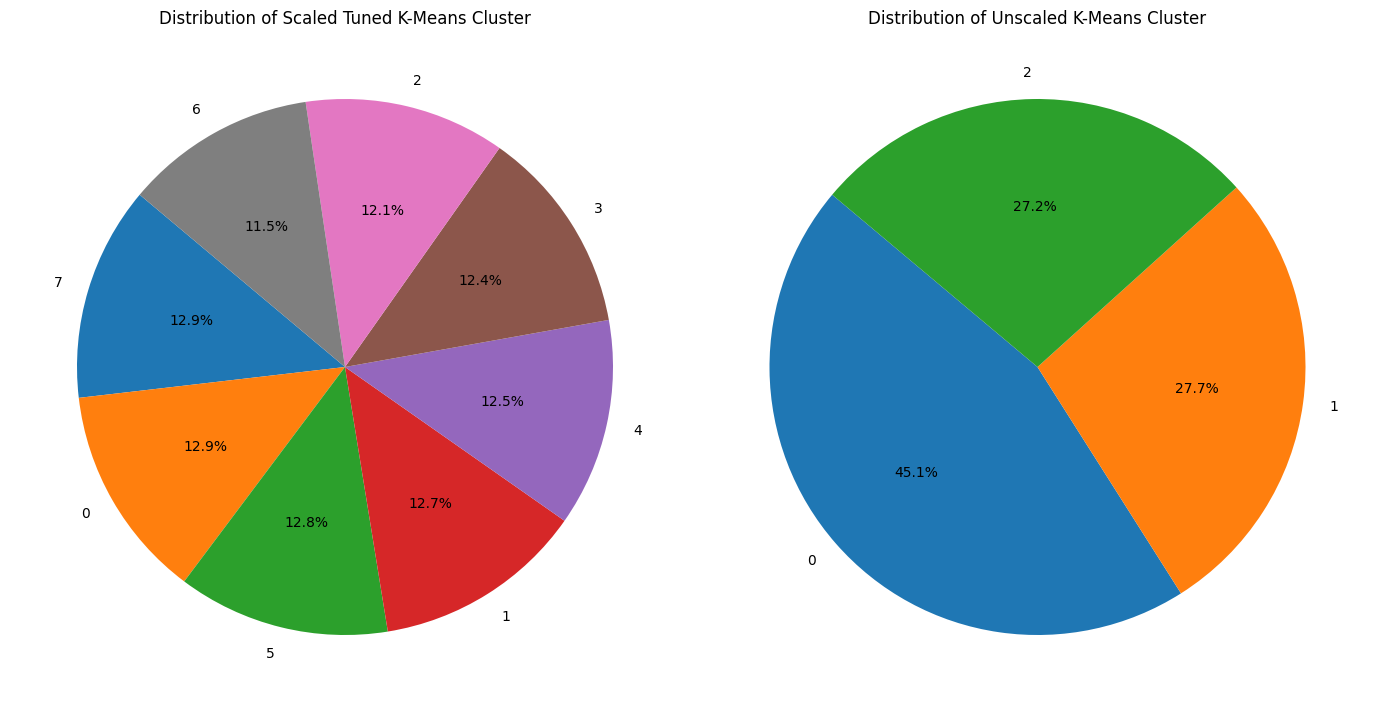

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for KMeans_Cluster_Scaled
y_counts_scaled = df['KMeans_Cluster_Scaled'].value_counts()
axes[0].pie(
    y_counts_scaled,
    labels=y_counts_scaled.index,
    autopct='%1.1f%%',
    startangle=140
)
axes[0].set_title('Distribution of Scaled Tuned K-Means Cluster')

# Pie chart for KMeans_Cluster (unscaled)
y_counts_unscaled = df['KMeans_Cluster'].value_counts()
axes[1].pie(
    y_counts_unscaled,
    labels=y_counts_unscaled.index,
    autopct='%1.1f%%',
    startangle=140
)
axes[1].set_title('Distribution of Unscaled K-Means Cluster')

plt.tight_layout()
plt.show()

### Comparison of Cluster Distributions

The two pie charts compare the distribution of data points across clusters for the unscaled K-Means model (3 clusters) and the scaled and tuned K-Means model (8 clusters).

**Unscaled K-Means (3 Clusters):**

* The cluster distribution is uneven, with Cluster 0 dominating the segmentation by containing approximately 45% of the total data points.

* Clusters 1 and 2 are more balanced, each representing around 27% of the dataset.

* This indicates that, without feature scaling, the clustering process is strongly influenced by features with larger numeric ranges, resulting in broader clusters and one dominant segment.

* While this produces clearer and more compact groupings, it may oversimplify customer behavior by grouping diverse individuals into a single large cluster.

**Scaled and Tuned K-Means (8 Clusters):**

* After applying feature scaling and tuning the number of clusters, the data points are distributed more evenly across the 8 clusters.

* Each cluster contains approximately 11%–13% of the total dataset, indicating a highly balanced segmentation.

* This balanced distribution suggests that scaling allowed the algorithm to treat all features with equal importance, enabling the identification of more granular customer segments.

* However, despite the improved balance, the increased number of clusters led to greater overlap between clusters, which is reflected in the lower silhouette score obtained by the scaled model.

**Overall Comparison:**

* The unscaled K-Means model produces fewer but more compact clusters, resulting in a higher silhouette score and clearer separation.

* In contrast, the scaled and tuned K-Means model offers finer segmentation with balanced cluster sizes but at the cost of reduced cluster cohesion and separation.

* Based on both the silhouette score and the cluster distribution, the unscaled K-Means model demonstrates better overall clustering performance for this dataset, while the scaled model provides deeper but less distinct segmentation.

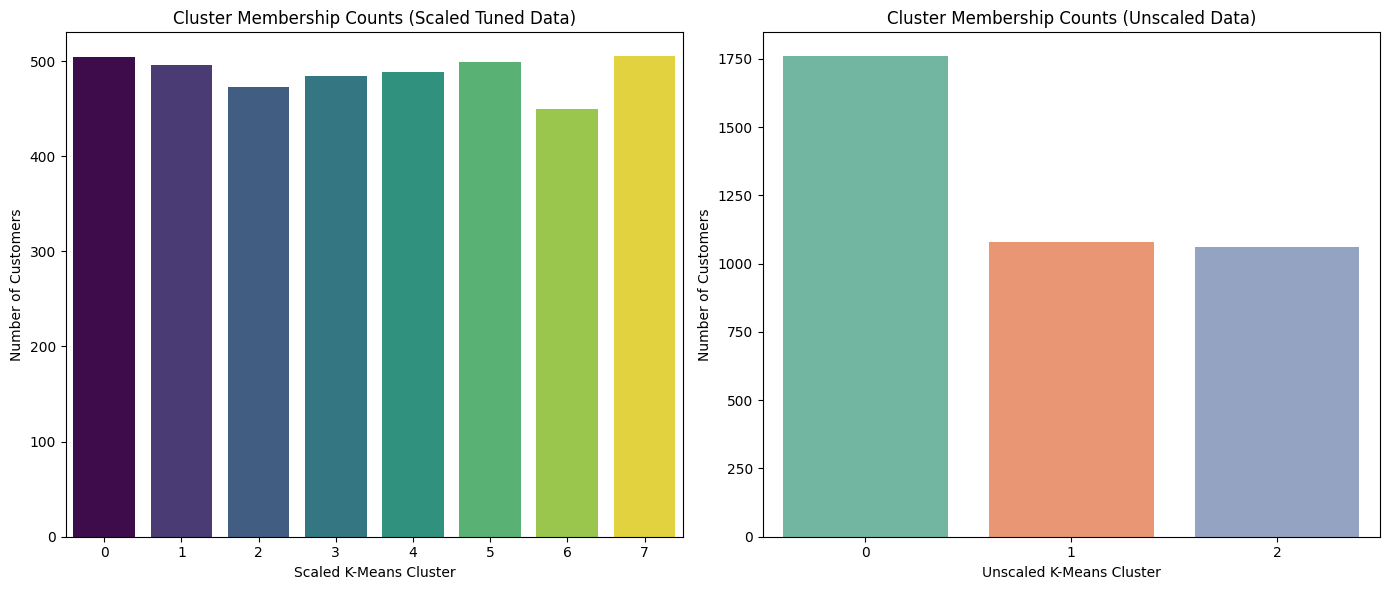

In [ ]:
plt.figure(figsize=(14, 6))

# Scaled K-Means Clusters
plt.subplot(1, 2, 1)
sns.countplot(
    x='KMeans_Cluster_Scaled',
    hue='KMeans_Cluster_Scaled',
    data=df,
    palette='viridis',
    legend=False
)
plt.title('Cluster Membership Counts (Scaled Tuned Data)')
plt.xlabel('Scaled K-Means Cluster')
plt.ylabel('Number of Customers')

# Unscaled K-Means Clusters
plt.subplot(1, 2, 2)
sns.countplot(
    x='KMeans_Cluster',
    hue='KMeans_Cluster',
    data=df,
    palette='Set2',
    legend=False
)
plt.title('Cluster Membership Counts (Unscaled Data)')
plt.xlabel('Unscaled K-Means Cluster')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

### Comparison of Cluster Distributions

The two side-by-side countplots illustrate the distribution of customers across clusters for both the unscaled K-Means (3 clusters) and the scaled K-Means (8 clusters).

**Unscaled K-Means (3 Clusters):**
*   The distribution is noticeably uneven. Cluster 0 is significantly larger, containing nearly half of all customers, while Clusters 1 and 2 are more balanced but still smaller.
*   This indicates that without scaling, the clustering algorithm might be heavily influenced by the raw magnitudes of the features, leading to less granular and potentially overlapping clusters where one large cluster dominates.

**Scaled K-Means (8 Clusters):**
*   After scaling the data and optimizing for 8 clusters, the distribution of customers across clusters is much more balanced.
*   Each of the 8 clusters holds a more comparable number of data points, ranging from approximately 11% to 13% of the total customer base.
*   This more even distribution suggests that the scaling process helped the algorithm to identify more distinct and granular segments of the customer base, where differences in feature values are given equal weight, regardless of their original scale.
*   The increased number of clusters and their balanced sizes allow for a more detailed and nuanced understanding of different customer profiles, which aligns with the goal of customer segmentation.

**Overall Comparison:**
* The unscaled K-Means model produces an uneven cluster distribution, with one dominant cluster containing a large proportion of customers, indicating broader and less detailed segmentation.

* The scaled K-Means model results in a more balanced distribution across clusters, suggesting that scaling enables the identification of more granular and evenly sized customer segments.

* Overall, from a distribution perspective, the scaled K-Means model offers more detailed segmentation, while the unscaled model provides simpler but more aggregated customer groupings.

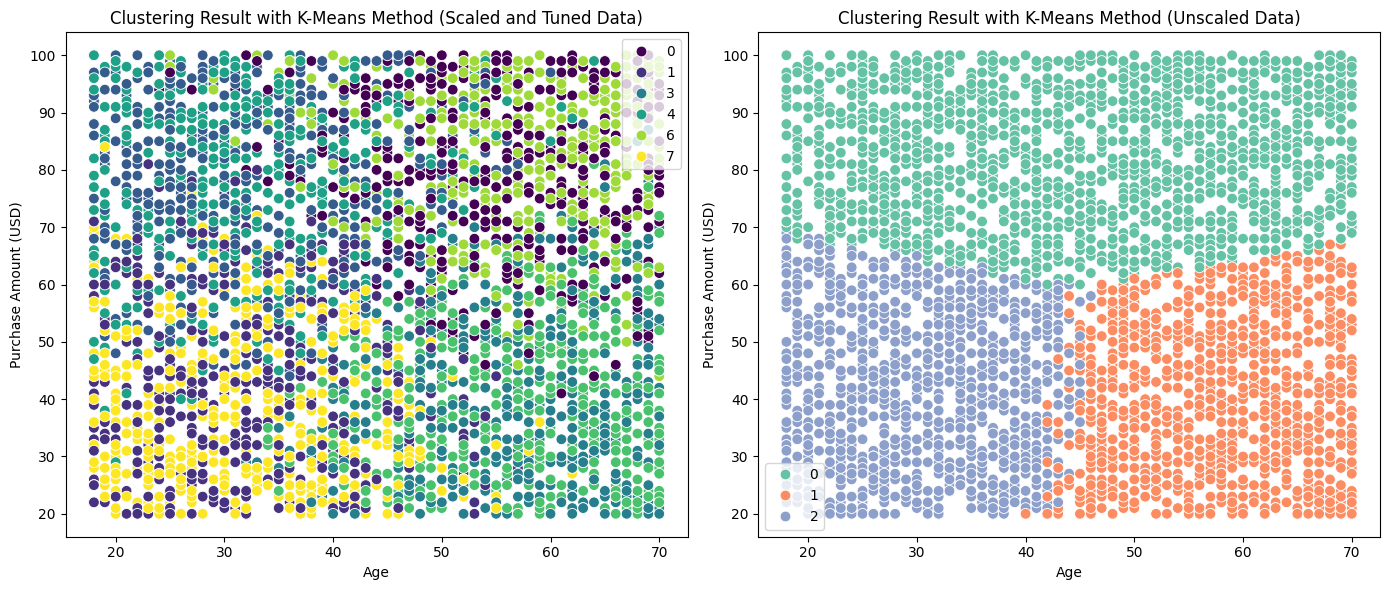

In [ ]:
plt.figure(figsize=(14, 6))

# Scaled K-Means Clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x = "Age", y = "Purchase Amount (USD)", hue="KMeans_Cluster_Scaled", palette="viridis", data=df, s = 60)
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.title("Clustering Result with K-Means Method (Scaled and Tuned Data)")
plt.legend()

# Unscaled K-Means Clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x = "Age", y = "Purchase Amount (USD)", hue="KMeans_Cluster", palette="Set2", data=df, s = 60)
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.title("Clustering Result with K-Means Method (Unscaled Data)")
plt.legend()

plt.tight_layout()
plt.show()

### Comparison of Clustering Results (Scatter Plots)

The two scatter plots illustrate the clustering results produced by the scaled and tuned K-Means model and the unscaled K-Means model, using Age and Purchase Amount (USD) as the input features.

**Scaled and Tuned K-Means:**

* The clusters appear highly intermixed, with significant overlap across both age and purchase amount dimensions.

* Data points belonging to different clusters are spread throughout the plot, making it difficult to visually distinguish clear cluster boundaries.

* This indicates that after scaling, both features contribute equally to the distance calculation, but the dataset does not exhibit strong natural groupings when age and purchase amount are weighted equally.

* As a result, the model produces more granular but less cohesive clusters, which is consistent with the lower silhouette score observed for the scaled model.

**Unscaled K-Means**:

* The clusters show clear and well-defined boundaries, with minimal overlap between groups.

* Cluster separation is largely driven by purchase amount, forming distinct horizontal segments, while age contributes to secondary separation.

* The resulting clusters are more compact and visually interpretable, indicating stronger intra-cluster similarity and inter-cluster separation.

* This visual clarity aligns with the higher silhouette score achieved by the unscaled K-Means model.

**Overall Comparison:**

* The unscaled K-Means model demonstrates superior cluster separation and cohesion, both visually and quantitatively.

* In contrast, the scaled and tuned K-Means model reveals that the dataset lacks strong multi-dimensional cluster structure when all features are given equal importance.

* Based on the scatter plots and silhouette scores, the unscaled K-Means model provides better clustering performance for this dataset, while the scaled model offers finer but less distinct segmentation.

# Hierarchical Clustering Model

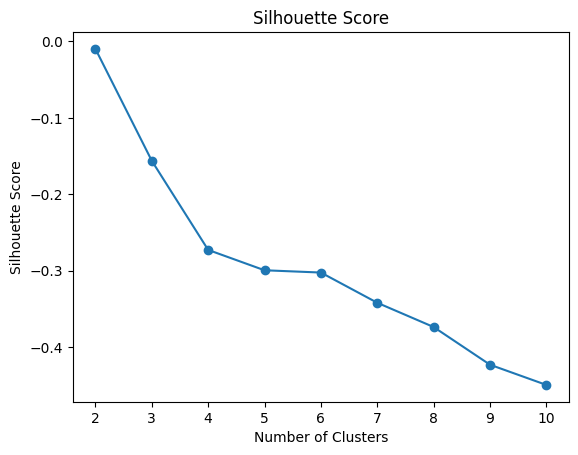

In [ ]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_model)
    silhouette_avg = silhouette_score(df_model, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Skipping Ward linkage with Manhattan metric (not supported).


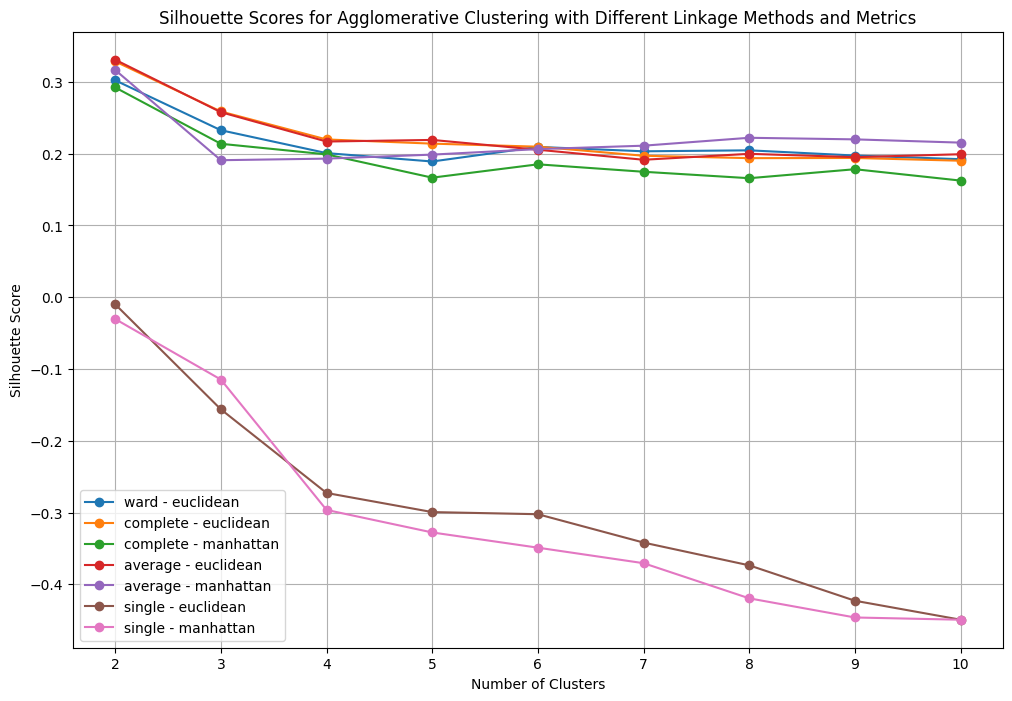

Best Silhouette Score: 0.33086111448688676
Optimal Number of Clusters: 2
Optimal Linkage Method: average
Optimal Metric: euclidean


In [ ]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported, ward hanya bisa euclidian
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_model)
            silhouette_avg = silhouette_score(df_model, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

In [ ]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_model)

## Model Evaluation

In [ ]:
# Evaluation
ss = silhouette_score(df_model, y_hc)
print(ss)

0.33086111448688676


## Dendogram Visualization for Hierarchical Clustering Model

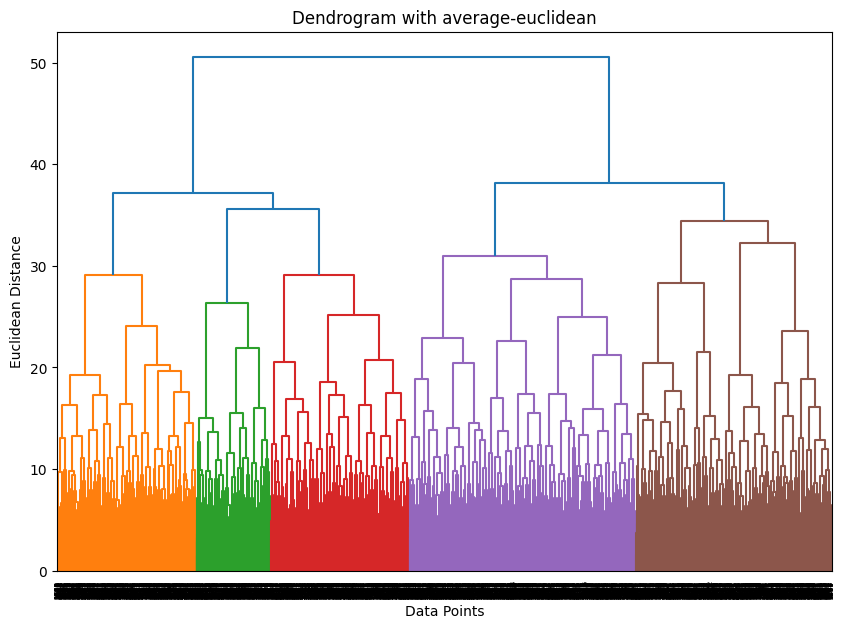

In [ ]:
# Average Distance
linked = linkage(df_model, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [ ]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group,KMeans_Cluster,KMeans_Cluster_Scaled,Agglo
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,46-55,1,5,0
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,18-25,2,4,1
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,46-55,0,6,0
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-25,0,2,1
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,36-45,1,1,0


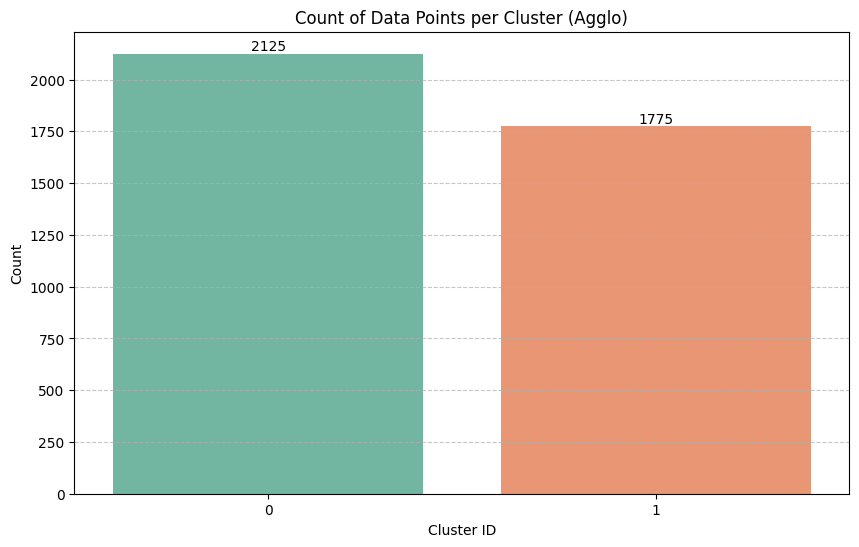

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
cluster_summary_agglo = df.groupby('Agglo').agg({
    'Age': ['mean', 'min', 'max'],
    'Purchase Amount (USD)': ['mean', 'min', 'max'],
    'Review Rating': ['mean', 'min', 'max'],
    'Previous Purchases': ['mean', 'min', 'max']
})

cluster_summary_agglo = cluster_summary_agglo.rename_axis('Agglo_Cluster')

print("Summary of Clusters (Hierarchical Data):")
display(cluster_summary_agglo)

Summary of Clusters (Hierarchical Data):


Age         Purchase Amount (USD)          Review Rating  \
                    mean min max                  mean min  max          mean   
Agglo_Cluster                                                                   
0              46.310118  18  70             41.773176  20   80      3.729129   
1              41.384789  18  70             81.303099  50  100      3.774873   

                        Previous Purchases          
               min  max               mean min max  
Agglo_Cluster                                       
0              2.5  5.0          24.901647   1  50  
1              2.5  5.0          25.890141   1  50

# Insights, Interpretation, and Conclusions

In [ ]:
from sklearn.metrics import silhouette_score

# Silhouette score for K-Means on scaled data
silhouette_scaled = silhouette_score(
    df_model_scaled,
    df['KMeans_Cluster_Scaled']
)

# Silhouette score for K-Means on unscaled data
silhouette_unscaled = silhouette_score(
    df_model,
    df['KMeans_Cluster']
)

# Silhouette score for Hierarchical Agglomerative model
silhouette_agglo = silhouette_score(df_model, df['Agglo'])

# Print results
print(f"Silhouette Score (Scaled K-Means):   {silhouette_scaled:.3f}")
print(f"Silhouette Score (Unscaled K-Means): {silhouette_unscaled:.3f}")
print(f"Silhouette Score (Agglo):          {silhouette_agglo:.3f}")

# Compare and select best model
best_score = max(silhouette_scaled, silhouette_unscaled, silhouette_agglo)

if best_score == silhouette_scaled:
    print("✅ Scaled K-Means performs better based on silhouette score.")
elif best_score == silhouette_unscaled:
    print("✅ Unscaled K-Means performs better based on silhouette score.")
elif best_score == silhouette_agglo:
    print("✅ Hierarchical Agglomerative performs better based on silhouette score.")
else:
    print("⚖️ Multiple models perform equally best based on silhouette score.")

Silhouette Score (Scaled K-Means):   0.230
Silhouette Score (Unscaled K-Means): 0.289
Silhouette Score (Agglo):          0.331
✅ Hierarchical Agglomerative performs better based on silhouette score.


**Interpretation of the Cluster:**

The hierarchical clustering model segmented customers into two distinct groups, primarily differentiated by purchase amount, while age, review rating, and previous purchases remain relatively similar across clusters.

**Cluster 0: Moderate-Spending Customers**

Customers in Cluster 0 have a lower average purchase amount (≈ USD 41.77), with spending ranging from USD 20 to USD 80. The average age of this group is slightly higher (≈ 46.3 years), suggesting a more mature customer segment. Their review ratings are moderately positive (mean ≈ 3.73), and they show a consistent purchasing pattern with an average of approximately 25 previous purchases.

This cluster represents moderate-spending but engaged customers, who purchase regularly but at lower transaction values. They may respond well to promotions, bundles, or incentives designed to increase basket size.

**Cluster 1: High-Spending Customers**

Cluster 1 is characterized by a significantly higher average purchase amount (≈ USD 81.30), with spending levels ranging from USD 50 to USD 100. Customers in this cluster are slightly younger on average (≈ 41.4 years) and exhibit similar review ratings (mean ≈ 3.77) and purchasing frequency to Cluster 0.

This group represents high-value customers, as they consistently spend more per transaction while maintaining comparable engagement and satisfaction levels. This cluster is ideal for premium offerings, loyalty programs, and personalized retention strategies.

**Insight:**

Customer segmentation is primarily driven by purchase amount, with other factors (age, review rating, and purchase frequency) showing minimal differences across clusters.

Both clusters demonstrate similar engagement and satisfaction levels, indicating that spending behavior—not loyalty or experience—is the main differentiator.

The hierarchical model effectively separates moderate-value and high-value customers, supporting value-based segmentation.

**Recommendations:**

Cluster 0 (Moderate-Spending Customers):
Implement promotions, product bundles, and cross-selling strategies to increase average transaction value without compromising engagement.

Cluster 1 (High-Spending Customers):
Focus on retention through loyalty programs, personalized offers, and premium products to maintain and grow customer lifetime value.

Allocate marketing resources based on customer value, prioritizing high-spending customers while nurturing moderate spenders toward higher-value behavior.

**Conclusion:**

In this study, three clustering models were evaluated: **scaled K-Means, unscaled K-Means, and hierarchical (agglomerative) clustering**, with performance assessed using the silhouette score. The results show that the u**nscaled K-Means model achieved a higher silhouette score (0.289)** compared to the **scaled K-Means model (0.230)**, indicating better cluster separation when the original feature scales were preserved. This suggests that **purchase amount plays a dominant role in cluster formation**, and applying scaling reduces the influence of this key variable, leading to lower separability.

Despite this improvement over scaled K-Means, **hierarchical (agglomerative) clustering achieved the highest silhouette score overall (0.331)**, outperforming both K-Means configurations. This indicates that hierarchical clustering is more effective at capturing the underlying structure of the data by considering similarities across multiple dimensions simultaneously, rather than being driven primarily by a single dominant feature.

Additionally, the scaled K-Means model—particularly with a higher number of clusters—produced a **more balanced and granular customer segmentation**, allowing for finer differentiation in customer characteristics such as age and spending behavior. However, this increased granularity came at the cost of reduced cluster separation compared to the unscaled K-Means and hierarchical models.

Overall, the findings highlight a trade-off between **cluster quality and segmentation detail**. While unscaled K-Means performs better than scaled K-Means in terms of silhouette score, **hierarchical clustering emerges as the best-performing model for this dataset**, achieving the strongest cluster separation and most meaningful segmentation. Therefore, hierarchical clustering is the preferred approach when **cluster quality and interpretability are the primary objectives**, while K-Means remains useful for exploratory analysis and scalable segmentation tasks.